# <span style="color:darkblue"> Laboratorio di Simulazione Numerica </span>
#### <span style="color:darkred">  Riccardo Beccaria - Luglio 2021</span>

# <span style="color:green"> Esercitazione 10<span>
   

### Esercizio 10.1

By adapting your Genetic Algorithm (GA) code, developed during the Numerical Exercise 9, write a C++ code to solve the TSP with a **Simulated Annealing** (SA) algorithm. Apply your code to the optimization of a path among 

- 32 cities randomly placed on a circumference
- 32 cities randomly placed inside a square

Show your results via:

- a picture of the length of the best path as a function of the iteration of your algorithm
- a picture of the best path

and compare your SA results with those obtained with GA in the previosu numerical exercise.

Il codice sviluppato in questa esercitazione è di impronta simile all'algoritmo genetico sviluppato nella precedente esercitazione. In questo primo punto dell'esercizio ho scritto un codice per fare Simulated Annealing.

Il <font color="red">Simulated Annealing</font> è un metodo per cercare di risolvere problemi di ottimizzazione. Questa tecnica prende spunto da sistemi fisici (come ad esempio modelli di Ising) dove abbassando progressivamente la temperatura, il sistema tende a raggiungere la conformazione ad energia minore. In questo caso il problema di ottimizzazione è ancora quello del commesso viaggiatore, e la funzione costo da minimizzare non è l'energia ma la lunghezza del percorso. Le classi utilizzate in questo codice sono le stesse già presentate nella scorsa esercitazione, quindi non mi dilungo a spiegarle nuovamente.

In questo algoritmo si genera inizialmente un solo itinerario randomico. Partendo da una temperatura $T=3$ vengono proposte quattro possibile mosse campionate con l'*algoritmo di Metropolis*. Ovvero, si genera una delle quattro possibili mutazione sull'itinerario, e questa viene accettata con una probabilità pari a:

$$ A = \min (1, e^{-\beta \left( L^{(1)}_{new} - L^{(1)}_{old} \right)}) \quad \quad \beta=1/T$$

dove $L^{(1)}_{new}$ è per l'appunto la lunghezza del nuovo itinerario proposto. Se la mossa non viene accettata, l'itinerario rimane semplicemente l'itinerario iniziale. All'interno di una data temperatura $T$ ciascuna delle quattro mutazioni è tentata un certo numero di volte: nel mio caso ho osservato che tentare ogni mutazione 500 volte porta l'Algoritmo a una buona convergenza. Per campionare con il Metropolis l'itinerario attraverso le mutazioni, ho implementato le funzioni: `Metro_swap`, `Metro_permut`, `Metro_shift` e `Metro_invers`. Ciascuna di queste funzioni, richiama alla funzione di mutazione corrispondente implementata e spiegata nella esercitazione 9.

Partendo dalla temperatura $T=3$ e dopo aver tentato per 500 volte queste mutazioni, la temperatura viene abbassata di un fattore 0.997. A questo punto si rinizia da capo il ragionamento, campionando nuovamente l'itinerario con le quattro possibili mutazioni per 500 volte, per poi riabbassare ancora la temperatura. L'algoritmo si arresta una volta raggiunta la temperatura $T=0.3$

<font color="red">N.B.</font> chiaramente la temperatura non è una temperatura fisica, ma in questo caso è l'inverso di una lunghezza. Pertanto il range in cui si va a variare la temperatura deve rispettare il range di variazione della lunghezza tra le diverse configurazioni dell'itinerario.


Nei grafici sottostanti ho riportato:
1. Un primo grafico per verificare il corretto funzionamento del *Simulated Annealing*.
2. Il confronto tra *Algoritmo Genetico* e *Simulated Annealing* dei percorsi migliori al termine delle due simulazioni.
3. L'andamento di $L^{(1)}$ best e di $\langle L^{(1)}\rangle$ in funzione di $\beta=\frac{1}{T}$.

I commenti ai grafici sono stati fatti dopo averli plottati.

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import math
import numpy as np
%config InlineBackend.figure_format = 'retina'

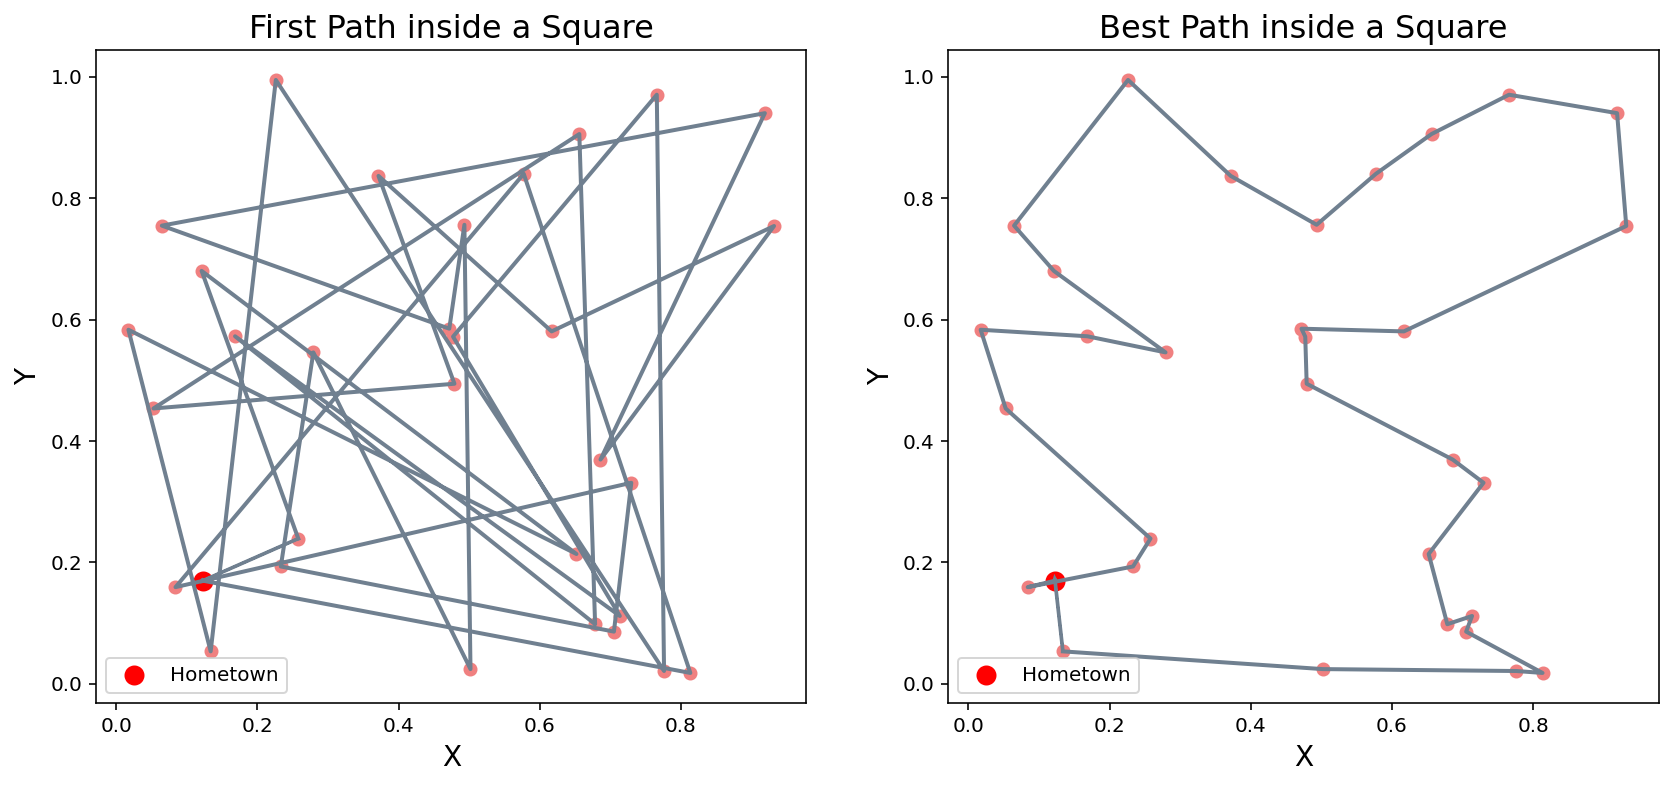

In [2]:
fig, axs= plt.subplots(1,2, figsize=(14,6))

x1,y1 = np.loadtxt("./10.1/First_trip_square.txt", usecols=(1,2),unpack=True)
x2,y2 = np.loadtxt("./10.1/Final_trip_square.txt", usecols=(1,2),unpack=True)

axs[0].set_title("First Path inside a Square", fontsize=16)
axs[0].plot(x1,y1, color='slategrey', linewidth=2)
axs[0].scatter(x1, y1, color='lightcoral')    
axs[0].scatter(x1[0], y1[0], color='red', marker='o', linewidths=4, label="Hometown")
axs[0].arrow(x1[31], y1[31], x1[0]-x1[31], y1[0]-y1[31], color='slategrey', linewidth=1.5)



axs[1].set_title("Best Path inside a Square", fontsize=16)
axs[1].plot(x2,y2, color='slategrey', linewidth=2)
axs[1].scatter(x2, y2, color='lightcoral')    
axs[1].scatter(x2[0], y2[0], color='red', marker='o', linewidths=4, label="Hometown")
axs[1].arrow(x2[31], y2[31], x2[0]-x2[31], y2[0]-y2[31], color='slategrey', linewidth=1.5)

for gino in axs.flat:
    gino.set_xlabel("X", fontsize=14)
    gino.set_ylabel("Y", fontsize=14)
    gino.legend(fontsize="medium")

plt.show()

Questo primo grafico mostra il confronto tra il primo percorso del Simulated Annealing, e il percorso migliore ottenuto al termine della simulazione con questo codice. Anche se si vede ad occhio che potrebbe esistere un percorso migliore per il Simulated Annealing, mi posso comunque reputare soddisfatto del funzionamento del codice. Va ricordato infatti che, anche con un numero molto alto di estrazioni, il simulated annealing è un metodo approssimativo, perchè non si potrà mai raggiungere una temperatura nulla. Per questo motivo il risultato ottenuto con il simulated annealing è sempre un'approssimazione "dall'alto" dell'energia di ground state del sistema: è alta la probabilità di raggiungere un minimo locale e non globale con questo algoritmo.

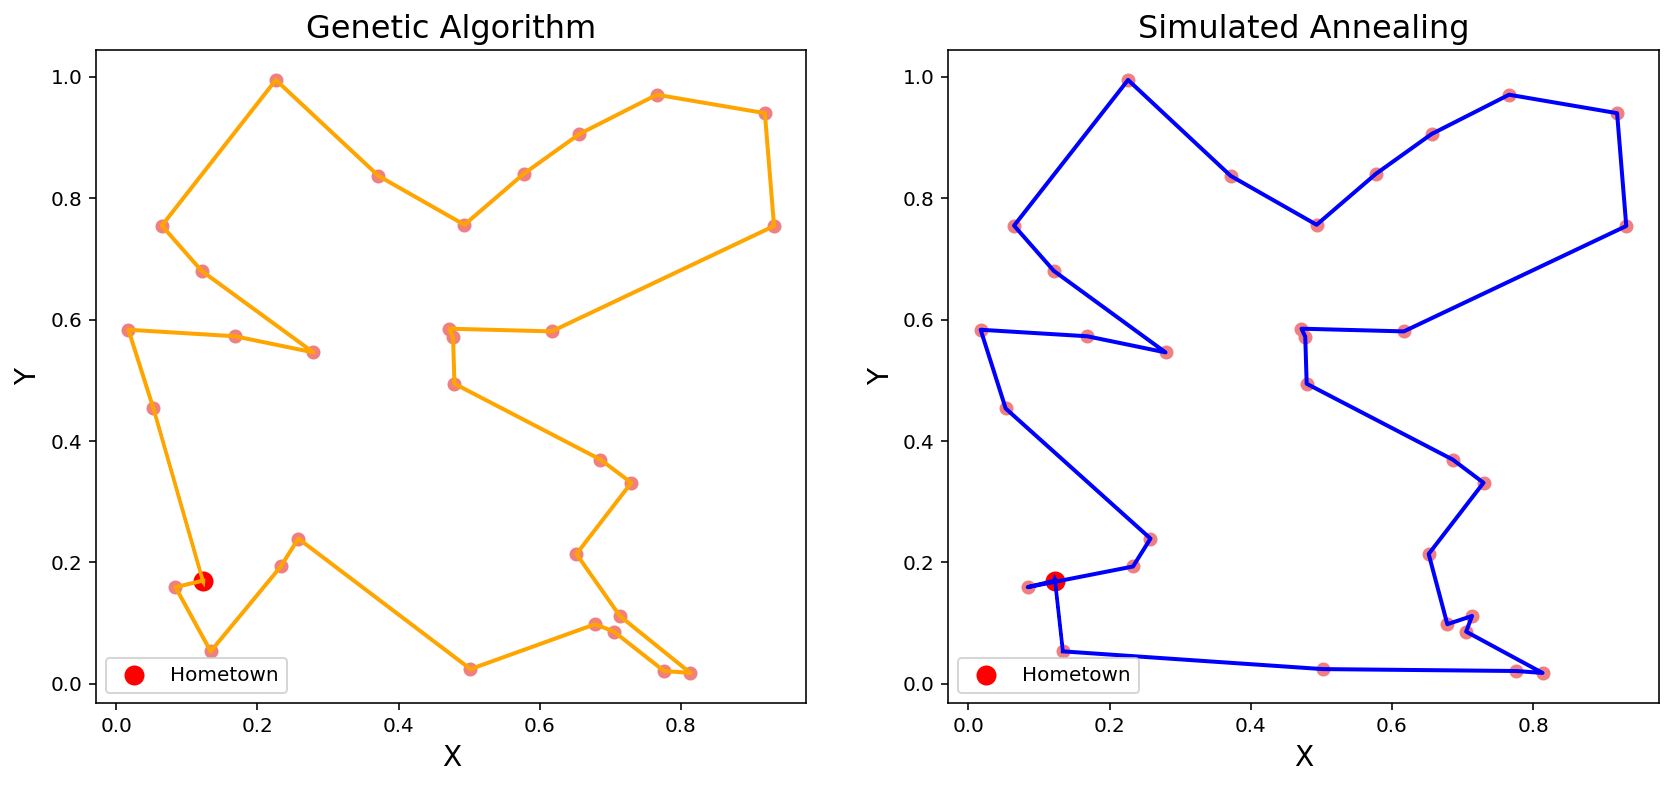

### Genetic Algorithm ###          ### Simulated Annealing ##
#    Square: 4.68713    #          #   Square:  4.72957     #
#########################          ##########################


In [3]:
fig, axs= plt.subplots(1,2, figsize=(14,6))

x1,y1 = np.loadtxt("./../Labo_9/09.1/Final_trip_square.txt", usecols=(1,2),unpack=True)
x2,y2 = np.loadtxt("./10.1/Final_trip_square.txt", usecols=(1,2),unpack=True)

GAsbest =  np.loadtxt("./../Labo_9/09.1/Best_len_square.txt", usecols=(1),unpack=True, skiprows=499)
GAcbest =  np.loadtxt("./../Labo_9/09.1/Best_len_circle.txt", usecols=(1),unpack=True, skiprows=1199)
SAsbest = np.loadtxt("10.1/Best_len_circle.txt", usecols=(1), unpack=True)
SAcbest = np.loadtxt("10.1/Best_len_circle.txt", usecols=(1), unpack=True, skiprows=766)
SAsbest = np.loadtxt("10.1/Best_len_square.txt", usecols=(1), unpack=True, skiprows=766)

axs[0].set_title("Genetic Algorithm", fontsize=16)
axs[0].plot(x1,y1, color='orange', linewidth=2)
axs[0].scatter(x1, y1, color='lightcoral')    
axs[0].scatter(x1[0], y1[0], color='red', marker='o', linewidths=4, label="Hometown")
axs[0].arrow(x1[31], y1[31], x1[0]-x1[31], y1[0]-y1[31], color='orange', linewidth=1.5)



axs[1].set_title("Simulated Annealing", fontsize=16)
axs[1].plot(x2,y2, color='blue', linewidth=2)
axs[1].scatter(x2, y2, color='lightcoral')    
axs[1].scatter(x2[0], y2[0], color='red', marker='o', linewidths=4, label="Hometown")
axs[1].arrow(x2[31], y2[31], x2[0]-x2[31], y2[0]-y2[31], color='blue', linewidth=1.5)

for gino in axs.flat:
    gino.set_xlabel("X", fontsize=14)
    gino.set_ylabel("Y", fontsize=14)
    gino.legend(fontsize="medium")

plt.show()


print("### Genetic Algorithm ###          ### Simulated Annealing ##")
#print("#    Circle:", GAcbest, "    #          #   Circle: ", SAcbest, "     #")
print("#    Square:", GAsbest, "   #          #   Square: ", SAsbest, "    #")
print("#########################          ##########################")



In questo grafico ho riportato le soluzioni del problema del commesso viaggiatore, ottenute sia con l'*Algoritmo Genetico* che con il *Simulated Annealing*. Ho riportato i due scatterplot degli itinerari con minore lunghezza al termine delle due simulazioni. Ho anche riportato i valori delle due Lunghezze minori ottenute che sono:
- 4.68713 per l'*Algoritmo Genetico*
- 4.72957 per il *Simulated Annealing*

I due risultati sono molto simili tra loro! Questo mi consente di affermare che anche il *Simulated Annealing* produce soluzioni ai problemi di ottimizzazioni prossime alle soluzioni ottenute con l'*Algoritmo Genetico*. Evidentemente l'*Algoritmo Genetico* ha ottenuto un itinerario con lunghezza di poco minore a quella ottenuta con il *Simulated Annealing*. Ma come ho appena spiegato, questo non mi preoccupa. Infatti il *Simulated Annealing* è un metodo approssimativo per il fatto che è impossibile raggiungere una temperatura nulla per il sistema: raggiungerà "soltanto" delle soluzioni che anche se non sono dei minimi globali, ci si avvicinano molto!

Va inoltre tenuto presente che il grosso vantaggio del *Simulated Annealing* risiede sul piano del <font color="red">costo computazionale</font>. Infatti il tempo di esecuzione del *Simulated Annealing* è di gran lunga inferiore al tempo di esecuzione dell'*Algoritmo Genetico*: il costo computazionale del codice sviluppato in questa esercitazione è pertanto minore.

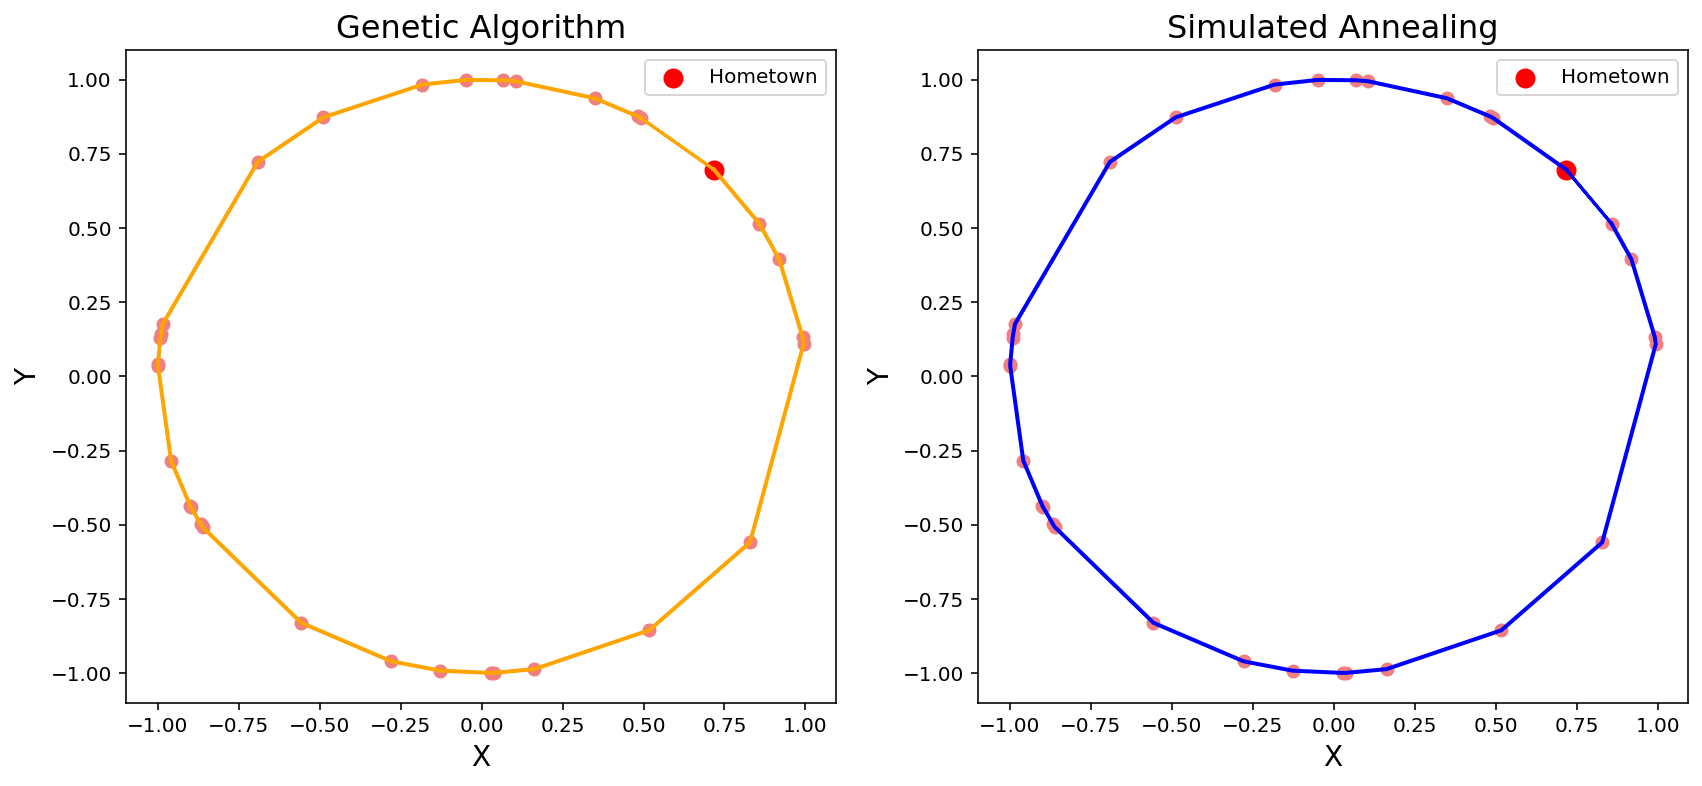

### Genetic Algorithm ###          ### Simulated Annealing ##
#    Circle: 6.2403     #          #   Circle:  6.2403      #
#########################          ##########################


In [4]:
fig, axs= plt.subplots(1,2, figsize=(14,6))

x1,y1 = np.loadtxt("./../Labo_9/09.1/Final_trip_circle.txt", usecols=(1,2),unpack=True)
x2,y2 = np.loadtxt("./10.1/Final_trip_circle.txt", usecols=(1,2),unpack=True)

axs[0].set_title("Genetic Algorithm", fontsize=16)
axs[0].plot(x1,y1, color='orange', linewidth=2)
axs[0].scatter(x1, y1, color='lightcoral')    
axs[0].scatter(x1[0], y1[0], color='red', marker='o', linewidths=4, label="Hometown")
axs[0].arrow(x1[31], y1[31], x1[0]-x1[31], y1[0]-y1[31], color='orange', linewidth=1.5)



axs[1].set_title("Simulated Annealing", fontsize=16)
axs[1].plot(x2,y2, color='blue', linewidth=2)
axs[1].scatter(x2, y2, color='lightcoral')    
axs[1].scatter(x2[0], y2[0], color='red', marker='o', linewidths=4, label="Hometown")
axs[1].arrow(x2[31], y2[31], x2[0]-x2[31], y2[0]-y2[31], color='blue', linewidth=1.5)

for gino in axs.flat:
    gino.set_xlabel("X", fontsize=14)
    gino.set_ylabel("Y", fontsize=14)
    gino.legend(fontsize="medium")

plt.show()

print("### Genetic Algorithm ###          ### Simulated Annealing ##")
print("#    Circle:", GAcbest, "    #          #   Circle: ", SAcbest, "     #")
#print("#    Square:", GAsbest, "   #          #   Square: ", SAsbest, "    #")
print("#########################          ##########################")

Per le città generate su una circonferenza invece, il risultato del *Simulated Annealing* e dell'*Algoritmo Genetico* è il medesimo.

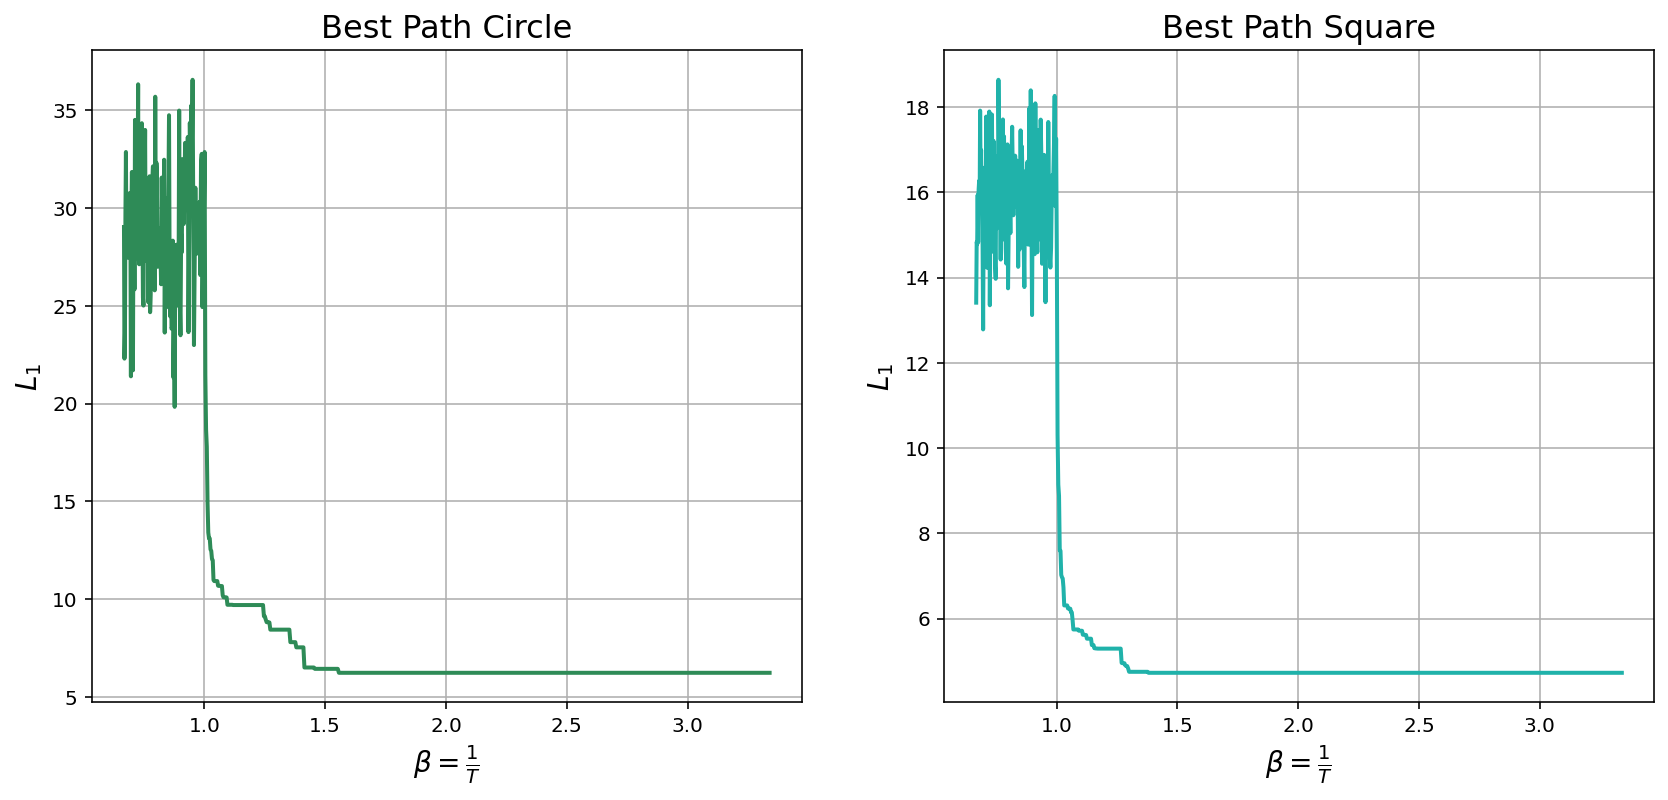

In [5]:
fig, axs= plt.subplots(1,2, figsize=(14,6))
beta_circle,best_circle=np.loadtxt("10.1/Best_len_circle.txt", usecols=(0,1), skiprows=230, unpack=True)
beta_square,best_square=np.loadtxt("10.1/Best_len_square.txt", usecols=(0,1), skiprows=230, unpack=True)

axs[0].set_title("Best Path Circle", fontsize=16)
axs[0].plot(beta_circle,best_circle, color='seagreen', linewidth=2)

axs[1].set_title("Best Path Square", fontsize=16)
axs[1].plot(beta_square,best_square, color='lightseagreen', linewidth=2)

for ax in axs.flat:
    ax.grid(True)
    ax.set_xlabel(r'$\beta=\frac{1}{T}$', fontsize=14)
    ax.set_ylabel(r'$L_1$', fontsize=14)


Nel grafico soprastante ho invece riportato l'andamento della Lughezza dell'itinerario al crescere di $\beta$ e quindi al diminuire della temperatura $T$.

Come ci si può aspettare, ad alte temperature $T$ (bassi $\beta$) si osserva una grande fluttuazione nella lunghezza migliore dell'itinerario. Questo è dovuto al fatto che nel *Simulated Annealing* la probabilità di accettare una mutazione tentata è come detto:

$$ A = \min (1, e^{-\beta \left( L^{(1)}_{new} - L^{(1)}_{old} \right)}) \quad \quad \beta=1/T$$

Pertanto per alte temperature $T$ (bassi $\beta$) la probabilità di accettazione è molto prossima a 1 per qualunque configurazione *new* e *old*: si osserva grande fluttuazione nella lunghezza dell'itinerario.

Invece mano a mano che si abbassa la temperatura $T$ (si alza $\beta$), cominceranno a dominare solamente gli itinerari che hanno lunghezza minore: più si abbassa $T$, più queste conformazioni saranno dominanti, fino al punto che ne rimane una sola dominante a cui l'algoritmo converge come si può osservare dal grafico.

### Esercizio 10.2

Parallelize with MPI libraries your Genetic Algorithm code in order to solve the TSP by performing a *Genetic Search* with 4 parallel GA searches of the optimal path:
each node should perform an independent GA search the so-called *Continents*, but every $N_{migr}$ generations the *Continents* should exchange their best individuals randomly.
Apply your code to the TSP problem for 32 cities randomly placed inside a square and try to estimate if your performances improve with *Continents*.

In questo secondo punto dell'esercizio viene parallelizzato il codice dell'*Algoritmo Genetico*. Con <font color="red">parallelizzare</font> si intende eseguire il GA su quattro diversi nodi in maniera indipendente. Il motivo per cui si parallelizza è che dopo un certo numero $N_{migr}$ di migrazioni, due tra i quattro continenti cercano di scambiarsi il loro itinerario migliore: quello con lunghezza minore. Questo metodo, come mostrerò nei grafici sottostanti, velocizza la convergenza dell'algoritmo. Infatti qualora uno dei quattro continenti, riuscisse a raggiungere l'itinerario *best* prima degli altri, ha una certa probabilità di scambiarlo con gli altri tre nodi. Per cui può succedere che anche se un continente non ha raggiunto indipendentemente il minimo globale, ha una certa probabilità di riceverlo "gratis" da uno degli altri tre.

Per la parallelizzazione ho scaricato e utilizzato la libreria `mpi.h`. Affinchè le città fossero generate tutte e $32$ nello stesso modo, vengono caricate da un file generato nella scorsa esercitazione, che presenta tutte e $32$ le città con le rispettive coordinate: ho implementato questa opzione nel costruttore della classe `Cities` già presentata nello scorso esercizio.

Oltre ai noti comandi di inizializzazione e finalizzazione della parallelizzazione (come ad esempio *MPI_Init(&argc,&argv)*, *MPI_Finalize( )*, etc...) per eseguire lo scambio tra due nodi dei loro itinerari migliori dopo un certo numero di migrazioni $N_{migr}$, si segue il seguente ragionamento:

1. Faccio estrarre casualmente ad uno dei nodi (nel mio caso al nodo 0) due rank di nome rank1 e rank2, con l'accortezza di verificare che siano diversi.
2. A questo punto comunico a tutti i nodi la scelta di questi due rank. Per far questo utilizzo il comando: `MPI_Bcast(&rank1, 1, MPI_INT, 0, MPI_COMM_WORLD)` dove *MPI_BCAST( )* è appunto la funzione per far comunicare tutti i rank tra loro comunicando un certo numero di variabili (nel mio caso 1) di un certo tipo (nel mio caso di tipo intero MPI_INT). In questo modo tutti i nodi sanno chi è rank1 e chi è rank2
3. A questo punto i due nodi dati da rank1 e rank2, si scambiano il loro migliore itinerario. Per far questo ho utilizzato i comandi `MPI_Send()` e `MPI_Recv()`. L'unica accortezza da avere, è che questi due comandi non possono passare qualunquetipo di variabile tra i diversi nodi, e quello che vorrei scambiare tra i nodi solo i migliori elementi `Figlio` della classe `Generazione` già presentati nella scorsa esercitazione. Per far questo quindi ho dovuto trascrivere la mia classe Figlio con il miglior itinerario su un vettore di interi. Infatti MPI_Send() e MPI_Recv() possono tra loro scambiarsi vettori della classe `<vector>`: l'importante è dire a queste funzioni il numero di elementi che si vogliono trasferire tra i diversi nodi.
4. Una volta scambiati gli itinerari migliori, ciascun nodo salva quello che ha ricevuto nella sua Generazione dopo averne misurato la lunghezza dell'itinerario. Si riordina la generazione e ciascun algoritmo incomincerà nuovamente tutto il processo di mutazione e crossover presentato alla nona esercitazione fino a un nuoovo scambio dopo altre $N_{migr}$ generazioni. Nel mio codice ho utlizzato $N_{migr}=50$.

Ho riportato e commentato nei grafici sottostanti i risultati ottenuti.

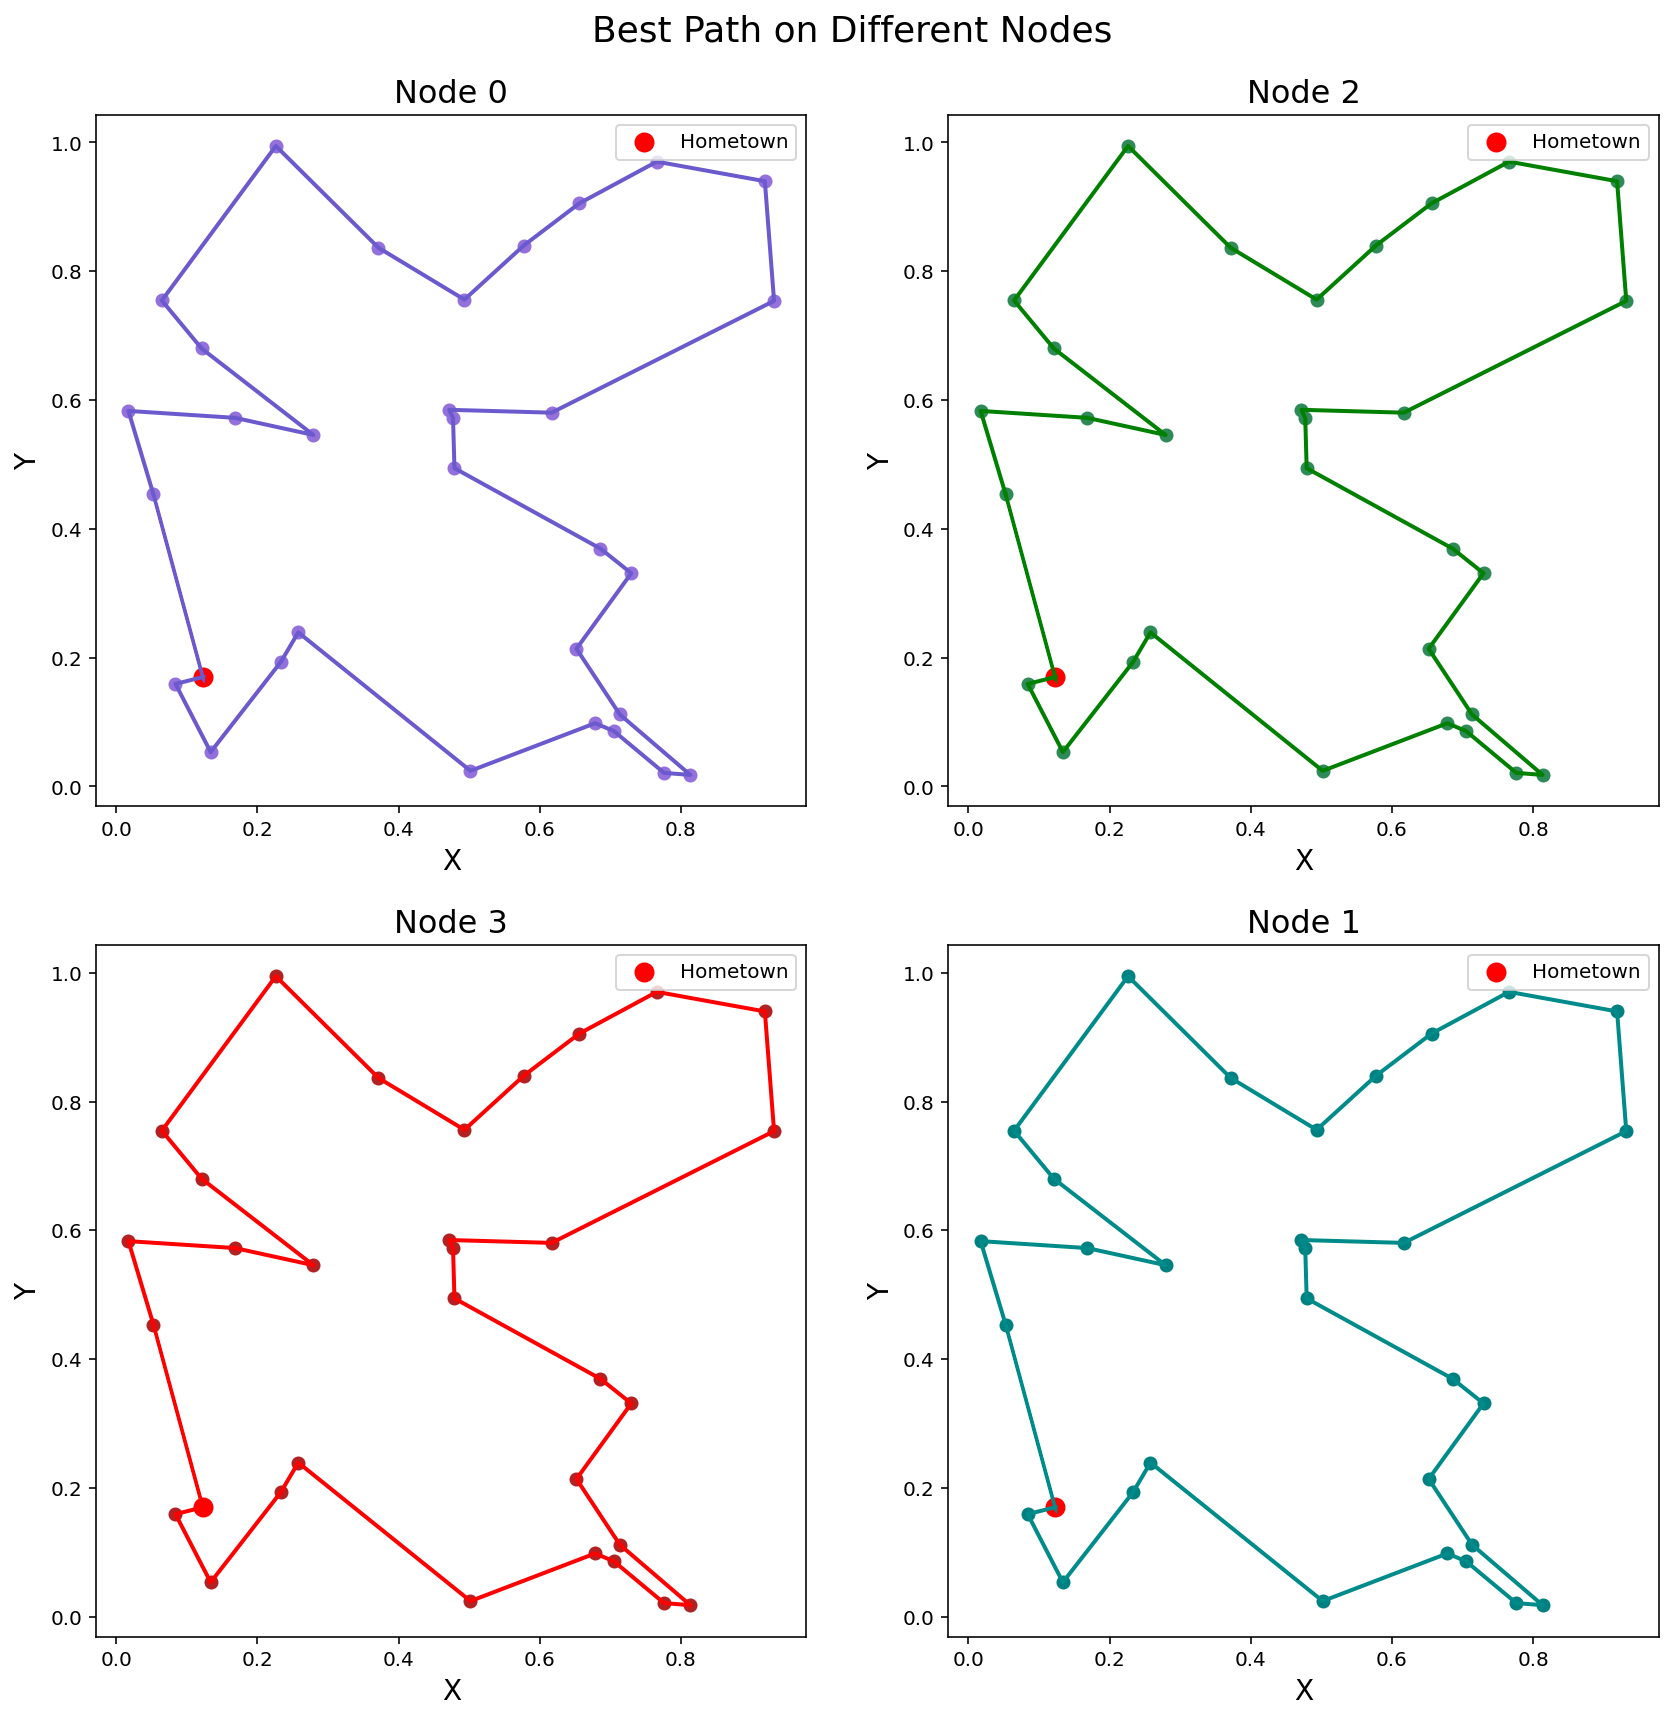

In [6]:
fig, axs= plt.subplots(2,2, figsize=(14,14))
plt.suptitle("Best Path on Different Nodes",fontsize=18, y=0.93)

x1,y1 = np.loadtxt("./10.2/0.First_trip.txt", usecols=(1,2),unpack=True)
x11,y11 = np.loadtxt("./10.2/0.Final_trip.txt", usecols=(1,2),unpack=True)

x2,y2 = np.loadtxt("./10.2/1.First_trip.txt", usecols=(1,2),unpack=True)
x22,y22 = np.loadtxt("./10.2/1.Final_trip.txt", usecols=(1,2),unpack=True)


x3,y3 = np.loadtxt("./10.2/2.First_trip.txt", usecols=(1,2),unpack=True)
x33,y33 = np.loadtxt("./10.2/2.Final_trip.txt", usecols=(1,2),unpack=True)

x4,y4 = np.loadtxt("./10.2/3.First_trip.txt", usecols=(1,2),unpack=True)
x44,y44 = np.loadtxt("./10.2/3.Final_trip.txt", usecols=(1,2),unpack=True)


axs[0][0].set_title("Node 0", fontsize=16)
axs[0][0].plot(x11,y11, color='slateblue', linewidth=2)
axs[0][0].scatter(x11, y11, color='mediumpurple')    
axs[0][0].scatter(x11[0], y11[0], color='red', marker='o', linewidths=4, label="Hometown")
axs[0][0].arrow(x11[31], y11[31], x11[0]-x11[31], y11[0]-y11[31], color='slateblue', linewidth=1.5)



axs[1][1].set_title("Node 1", fontsize=16)
axs[1][1].plot(x22,y22, color='darkcyan', linewidth=2)
axs[1][1].scatter(x22, y22, color='teal')    
axs[1][1].scatter(x22[0], y22[0], color='red', marker='o', linewidths=4, label="Hometown")
axs[1][1].arrow(x22[31], y22[31], x22[0]-x22[31], y22[0]-y22[31], color='darkcyan', linewidth=1.5)


axs[0][1].set_title("Node 2", fontsize=16)
axs[0][1].plot(x33,y33, color='green', linewidth=2)
axs[0][1].scatter(x33, y33, color='seagreen')    
axs[0][1].scatter(x33[0], y33[0], color='red', marker='o', linewidths=4, label="Hometown")
axs[0][1].arrow(x33[31], y33[31], x33[0]-x33[31], y33[0]-y33[31], color='green', linewidth=1.5)


axs[1][0].set_title("Node 3", fontsize=16)
axs[1][0].plot(x44,y44, color='red', linewidth=2)
axs[1][0].scatter(x44, y44, color='firebrick')    
axs[1][0].scatter(x44[0], y44[0], color='red', marker='o', linewidths=4, label="Hometown")
axs[1][0].arrow(x44[31], y44[31], x44[0]-x44[31], y44[0]-y44[31], color='red', linewidth=1.5)

for gino in axs.flat:
    gino.set_xlabel("X", fontsize=14)
    gino.set_ylabel("Y", fontsize=14)
    gino.legend(fontsize="medium")

plt.show()



Innanzitutto ho riportato in questi quattro grafici i quattro itinerari migliori raggiunti dai quattro nodi. Come è ovvio aspettarsi (se il codice funzione correttamente), questi itinerari sono tra loro perfettament euguali. Questo è un buon indizio del fatto che l'algoritmo funziona correttamente. Se infatti al termine della simulazione, uno dei quattro nodi avesse presentato un itinerario *best* diverso dagli altri voleva dire che i rank tra loro non comunicavano e non scambaivano correttamente. È quindi rincuorante vedere al termine della simulazione quattro itinerari uguali tra loro.

Inoltre se si contronta questo percorso ottenuto con l'*Algoritmo Genetico* parallelizzato, si può vedere che è identico al percorso ottenuto con l'*Algoritmo Genetico* in serie.

######### Square #########
#    Best1: 4.68713     #
#    Medium1: 4.84373     #
##########################


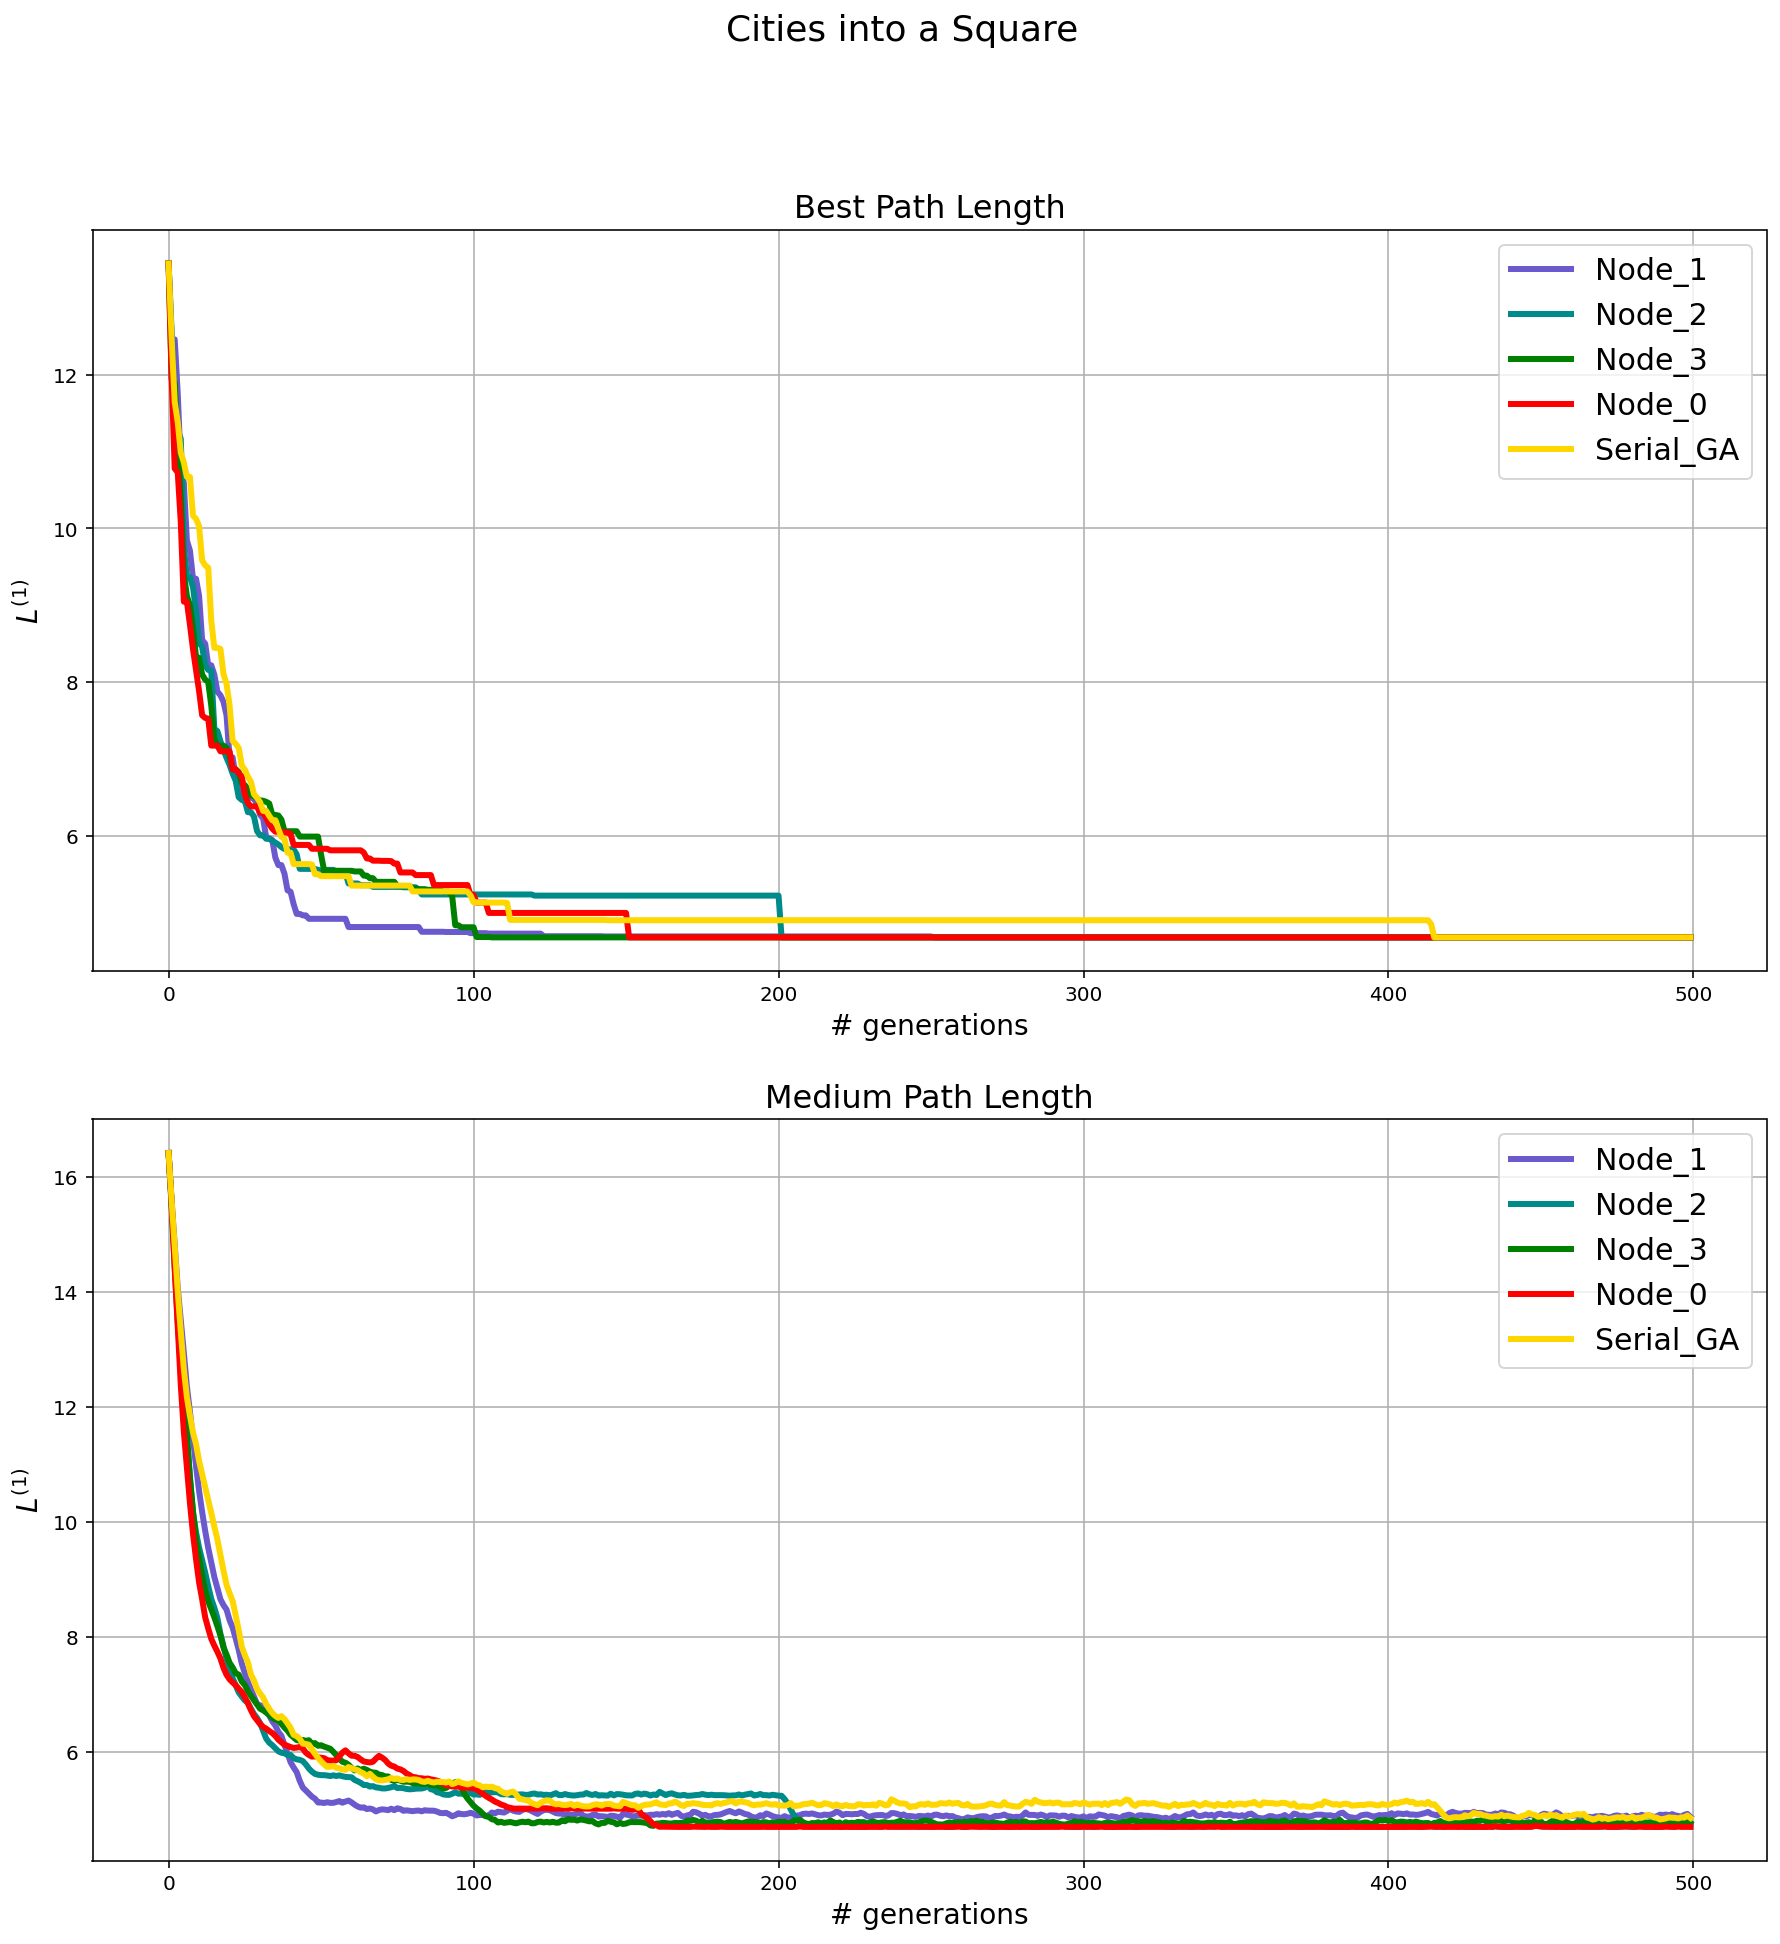

In [7]:
fig, axs= plt.subplots(2,1, figsize=(15,15))

plt.suptitle("Cities into a Square", fontsize=18)

gen_serial, best_serial = np.loadtxt("./../Labo_9/09.1/Best_len_square.txt", usecols=(0,1), unpack=True)
gen_serial, medium_serial = np.loadtxt("./../Labo_9/09.1/Medium_len_square.txt", usecols=(0,1), unpack=True)

gen1, best1 = np.loadtxt("10.2/0.Best_len.txt", usecols=(0,1), unpack=True)
gen1, medium1 = np.loadtxt("10.2/0.Medium_len.txt", usecols=(0,1), unpack=True)

gen2, best2 = np.loadtxt("10.2/1.Best_len.txt", usecols=(0,1), unpack=True)
gen2, medium2 = np.loadtxt("10.2/1.Medium_len.txt", usecols=(0,1), unpack=True)

gen3, best3 = np.loadtxt("10.2/2.Best_len.txt", usecols=(0,1), unpack=True)
gen3, medium3 = np.loadtxt("10.2/2.Medium_len.txt", usecols=(0,1), unpack=True)

gen4, best4 = np.loadtxt("10.2/3.Best_len.txt", usecols=(0,1), unpack=True)
gen4, medium4 = np.loadtxt("10.2/3.Medium_len.txt", usecols=(0,1), unpack=True)

axs[0].set_title("Best Path Length", fontsize=16)
axs[0].plot(gen1, best1, color='slateblue', linewidth=3, label='Node_1')
axs[0].plot(gen2, best2, color='darkcyan', linewidth=3, label='Node_2')
axs[0].plot(gen3, best3, color='green', linewidth=3, label='Node_3')
axs[0].plot(gen4, best4, color='red', linewidth=3, label='Node_0')
axs[0].plot(gen_serial, best_serial, color='gold',linewidth=3, label='Serial_GA')


axs[1].set_title("Medium Path Length", fontsize=16)
axs[1].plot(gen1, medium1, color='slateblue', linewidth=3, label='Node_1')
axs[1].plot(gen2, medium2, color='darkcyan', linewidth=3, label='Node_2')
axs[1].plot(gen3, medium3, color='green', linewidth=3, label='Node_3')
axs[1].plot(gen4, medium4, color='red', linewidth=3, label='Node_0')
axs[1].plot(gen_serial, medium_serial, color='gold', linewidth=3, label='Serial_GA')

for gino in axs.flat:
    gino.set_xlabel("# generations", fontsize=14)
    gino.set_ylabel("$L^{(1)}$", fontsize=14)
    #gino.set_xlim( right=1500)
    gino.grid()
    gino.legend(fontsize=15)
    
    
print("######### Square #########")
print("#    Best1:", best_serial[-1], "    #")
print("#    Medium1:", medium_serial[-1], "    #")
print("##########################")


plt.show()

#Per ottenere questa cosa devi mettere: 500 generazioni; 600 figli; n_migr=50

Da ultimo ho rappresentato per ciascun nodo dell'*Algoritmo Genetico* parallelizzato e per l'*Algoritmo Genetico* in serie eseguito nelle esercitazione 9, l'andamento della lunghezza del migliore itinerario, e la lunghezza media degli itinerari, in funzione del numero di generazioni. In particolare nel grafico con la lunghezza migliore in funzione del numero di generazioni, si può osservare come l'aver parallelizzato il codice, migliora nettamente il funzionamento dell'algoritmo.

Infatti, dopo appena 200 generazioni ciascuno dei quattro nodi è riuscito a raggiungere la convergenza all'itinerario con lunghezza minore. La convergenza all'itinerario minimo non è perchè tutti e quattro i continenti hanno indipendentemente raggiunto l'itinerario *best*, ma perchè, come si può vedere dal netto salto compiuto dal Nodo_2 a 200 generazioni, i continenti tra di loro si scambiano l'itinerario con lunghezza minore dopo un certo numero di migrazioni completate.

Invece l'*Algoritmo Genetico* in serie eseguito nella esercitazione 9, converge al percorso di minima lunghezza dopo oltre 400 generazioni: più del doppio! Questo è dovuto al fatto che l'*Algoritmo genetico* in serie (a differenza dei continenti che si hanno con la parallelizzazzione) non può ricevere gratuitamente da nessuno l'itinerario migliore, ma deve raggiungerlo in maniera indipendente. 